# Heap Sort

In [41]:
def heapify(arr, n, i):
    largest = i
    left = 2*i + 1
    right = 2*i + 2

    if left < n and arr[largest] < arr[left]:
        largest = left
    if right < n and arr[largest] < arr[right]:
        largest = right
    if largest != i:
        arr[largest], arr[i] = arr[i], arr[largest]

        heapify(arr, n, largest)


def heapsort(arr):
    
    n = len(arr)

    for i in range(n//2 -1, -1, -1):
        heapify(arr, n, i)
    
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)


# Quick Sort

In [42]:
def partition(arr, low, high):
    pivot = arr[high]

    i = low - 1

    for j in range(low, high):
        if arr[j] < pivot:

            i+=1
            arr[i], arr[j] = arr[j], arr[i]
    
    arr[i+1], arr[high] = arr[high], arr[i+1]

    return i + 1

def quicksort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quicksort(arr, low, pi - 1)
        quicksort(arr, pi + 1, high)
        

In [43]:
# heap sort
import numpy as np
np.random.seed(42)

arr = list(np.arange(10000))
np.random.shuffle(arr)

heapsort(arr)
print(arr[:10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [44]:
# quicksort
import numpy as np
np.random.seed(42)

arr = list(np.arange(10000))
np.random.shuffle(arr)

low = 0
high = len(arr) - 1
quicksort(arr, low, high)
print(arr[:10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [47]:
# comparison
import time

arr_length = [10,100,1_000,10_000,100_000, 1_000_000]
heapsort_time_taken = []
quicksort_time_taken = []


for length in arr_length:
    # heapsort
    np.random.seed(42)
    arr = list(np.arange(length))
    np.random.shuffle(arr)
    
    start = time.time()
    heapsort(arr)
    end = time.time()

    time_taken = end - start
    heapsort_time_taken.append(time_taken)

    # quicksort
    np.random.seed(42)
    arr = list(np.arange(length))
    low = 0
    high = len(arr) - 1
    np.random.shuffle(arr)
    
    start = time.time()
    quicksort(arr, low, high)
    end = time.time()

    time_taken = end - start
    quicksort_time_taken.append(time_taken)


In [50]:
import matplotlib.pyplot as plt

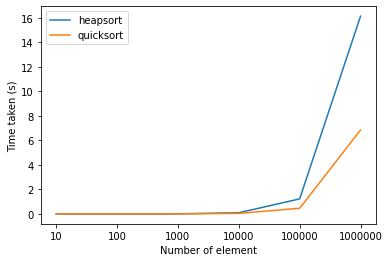

In [71]:
plt.plot(heapsort_time_taken, label='heapsort')
plt.plot(quicksort_time_taken, label='quicksort')
plt.xticks(ticks=range(len(arr_length)), labels=arr_length)
plt.xlabel('Number of element')
plt.ylabel('Time taken (s)')

plt.legend()

# it can be seen that quicksort took less time eventhough both sorting algorithms
# belong to the same family of O(n log n)